# **Sign Language Recognition in English Using CNN**

Communication is an essential aspect of our daily lives. However, individuals who are deaf or mute face significant challenges in interacting with others due to their inability to speak or hear. To bridge this communication gap, people with these disabilities often rely on sign language, which involves the use of hand gestures. 

Developing an application that can recognize these gestures and actions is crucial, as it would enable deaf and mute individuals to communicate more effectively with those who do not understand sign language. 

The goal of this work is to take a foundational step toward eliminating the communication barrier between people with hearing and speech impairments and those without, thereby facilitating better understanding and interaction through the use of sign language.


#  **Importing Libraries**

In [178]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# **Loading and Preprocessing the dataset**



In [179]:
from PIL import Image
import pandas as pd
import numpy as np
import os

def process_image(image_path):
    # Load the image
    image = Image.open(image_path).convert('L')  # Convert to grayscale
    # Resize the image to 28x28
    image = image.resize((28, 28))
    # Convert the image to a numpy array
    image_array = np.array(image).flatten()
    return image_array

def save_images_to_csv(image_directory, csv_filename):
    data = []
    labels = []
    for label in os.listdir(image_directory):
        print(label)
        num = 0
        label_path = os.path.join(image_directory, label)
        if os.path.isdir(label_path):
            for image_name in os.listdir(label_path):
                if num >= 1000:
                    print("reached")
                    break
                num += 1
                image_path = os.path.join(label_path, image_name)
                if image_path.endswith('.jpg'):
                    image_array = process_image(image_path)
                    data.append(image_array)
                    labels.append(label)
    
    # Convert the data to a DataFrame
    df = pd.DataFrame(data)
    # Add the label column
    df['label'] = labels
    # Save the DataFrame to a CSV file
    df.to_csv(csv_filename, index=False)

# Define the image directory and output CSV filename
image_directory = '/kaggle/input/american-sign-language/ASL_Dataset/Train/'
csv_filename = 'asl_images.csv'

# Process images and save to CSV
save_images_to_csv(image_directory, csv_filename)


N
reached
R
reached
Space
reached
B
reached
I
reached
F
reached
H
reached
E
reached
U
reached
M
reached
X
reached
K
reached
Q
reached
Y
reached
S
reached
G
reached
A
reached
O
reached
T
reached
V
reached
Z
reached
C
reached
P
reached
L
reached
W
reached
D
reached
Nothing
reached
J
reached


In [180]:
# Define the image directory and output CSV filename
image_directory = '/kaggle/input/american-sign-language/ASL_Dataset/Test/'
csv_filename = 'asl_images_test.csv'

# Process images and save to CSV
save_images_to_csv(image_directory, csv_filename)

N
R
Space
B
I
F
H
E
U
M
X
K
Q
Y
S
G
A
O
T
V
Z
C
P
L
W
D
Nothing
J


In [181]:
train_df=pd.read_csv('/kaggle/working/asl_images.csv')
test_df=pd.read_csv('/kaggle/working/asl_images_test.csv')

In [182]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 785 entries, 0 to label
dtypes: int64(784), object(1)
memory usage: 167.7+ MB


In [183]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Columns: 785 entries, 0 to label
dtypes: int64(784), object(1)
memory usage: 687.0+ KB


In [184]:
train_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,...,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000
mean,168.950000,168.825071,169.379107,169.555750,169.079643,169.566429,169.134893,169.068286,169.024071,168.684000,...,104.204321,108.422143,113.006393,118.029107,120.774107,124.348321,126.400893,127.072429,128.485893,127.397857
std,4.823141,4.662146,4.650946,4.618288,4.622460,4.552053,4.409434,4.357696,4.453568,4.643819,...,39.674143,37.567338,34.561970,29.973237,25.610179,20.569001,15.529583,12.181390,8.730248,6.825489
min,50.000000,132.000000,131.000000,128.000000,122.000000,101.000000,91.000000,93.000000,71.000000,66.000000,...,23.000000,25.000000,26.000000,27.000000,25.000000,24.000000,22.000000,23.000000,28.000000,31.000000
25%,166.000000,166.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,...,55.000000,60.000000,118.000000,125.000000,124.000000,125.000000,125.000000,125.000000,126.000000,124.000000
50%,169.000000,168.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,...,129.000000,129.000000,129.000000,129.000000,128.000000,129.000000,128.000000,128.000000,129.000000,127.000000
75%,171.000000,171.000000,172.000000,172.000000,171.000000,172.000000,171.000000,171.000000,171.000000,171.000000,...,133.000000,133.000000,133.000000,133.000000,132.000000,132.000000,132.000000,131.000000,132.000000,131.000000
max,200.000000,201.000000,203.000000,201.000000,200.000000,199.000000,200.000000,202.000000,203.000000,202.000000,...,227.000000,156.000000,181.000000,158.000000,161.000000,161.000000,160.000000,154.000000,155.000000,156.000000


In [185]:
train_df.head(6)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,165,166,168,168,166,167,171,174,170,170,...,136,138,132,130,129,129,125,125,123,N
1,170,169,170,170,170,170,170,171,173,171,...,42,67,125,126,126,126,125,124,123,N
2,168,166,165,167,166,166,167,168,168,170,...,136,134,133,128,128,126,124,121,123,N
3,168,167,168,169,168,169,169,169,167,170,...,130,132,131,129,129,129,131,131,127,N
4,169,169,170,167,169,169,167,167,167,172,...,121,127,127,127,130,128,129,127,126,N
5,165,163,169,170,168,172,170,168,172,170,...,39,44,125,127,123,125,125,127,128,N


The train_df dataset consit of 1st column representing labels 1 to 24.
The label is loaded in a seperate dataframe called 'train_label' and the 'label' column is dropped from the original training dataframe which now consist of only 784 pixel values for each image.

In [186]:
train_label=train_df['label']
train_label.head()
trainset=train_df.drop(['label'],axis=1)
trainset.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,165,166,168,168,166,167,171,174,170,170,...,141,136,138,132,130,129,129,125,125,123
1,170,169,170,170,170,170,170,171,173,171,...,63,42,67,125,126,126,126,125,124,123
2,168,166,165,167,166,166,167,168,168,170,...,138,136,134,133,128,128,126,124,121,123
3,168,167,168,169,168,169,169,169,167,170,...,130,130,132,131,129,129,129,131,131,127
4,169,169,170,167,169,169,167,167,167,172,...,45,121,127,127,127,130,128,129,127,126


Converting the dataframe to numpy array type to be used while training the CNN.
The array is converted from  1-D to 3-D which is the required input to the first layer of the CNN.
Similar preprocessing is done to the test dataframe.

In [187]:
X_train = trainset.values
X_train = trainset.values.reshape(-1,28,28,1)
print(X_train.shape)

(28000, 28, 28, 1)


In [188]:
test_label=test_df['label']
X_test=test_df.drop(['label'],axis=1)
print(X_test.shape)
X_test.head()

(112, 784)


,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,169,166,167,168,169,171,171,170,171,166,...,132,129,129,131,131,130,130,129,128,130
1,168,167,172,168,170,170,170,168,169,172,...,134,133,129,130,129,129,131,130,128,127
2,169,165,165,169,169,172,169,170,169,172,...,130,134,130,127,129,130,130,128,129,125
3,168,167,168,168,171,169,169,167,167,172,...,130,130,133,128,131,130,129,131,132,129
4,165,166,168,168,171,166,168,170,169,168,...,129,130,128,130,127,127,129,123,128,125


**Converting the integer labels to binary form**

The label dataframe consist of single values from 1 to 24 for each individual picture. The CNN output layer will be of 24 nodes since it has 24 different labels as a multi label classifier. Hence each integer is encoded in a binary array of size 24 with the corresponding label being 1 and all other labels are 0. Such as if y=4 the the array is [0 0 0 1 0 0.....0].
The LabelBinarizer package from sklearn.preprocessing is used for that. The document link is https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html

In [189]:
from sklearn.preprocessing import LabelBinarizer
lb=LabelBinarizer()
y_train=lb.fit_transform(train_label)
y_test=lb.fit_transform(test_label)

In [190]:
y_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [191]:
X_test=X_test.values.reshape(-1,28,28,1)

In [192]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(28000, 28, 28, 1) (28000, 28) (112, 28, 28, 1) (112, 28)


**Augmenting the image dataset to generate new data**

The `ImageDataGenerator` package from `keras.preprocessing.image` facilitates the augmentation of image datasets by applying various distortions such as random rotation, zooming, and scaling of height or width, pixel by pixel.

### Key Features of `ImageDataGenerator`:

1. **Random Transformations**:
   - **Rotation**: Randomly rotates images by a specified degree range.
   - **Width and Height Shift**: Shifts images horizontally or vertically by a fraction of total width or height.
   - **Shear Range**: Applies shear transformations.
   - **Zoom Range**: Randomly zooms into images.
   - **Horizontal Flip**: Flips images horizontally.

2. **Normalization**:
   - The `rescale` parameter normalizes each pixel by dividing its value by 255, ensuring pixel values range from 0 to 1.

### Explanation:

- **ImageDataGenerator Initialization**: Initializes an `ImageDataGenerator` object with various augmentation parameters like `rotation_range`, `width_shift_range`, `height_shift_range`, `shear_range`, `zoom_range`, `horizontal_flip`, and `rescale`.

- **Normalization (`rescale`)**: Divides each pixel by 255 to normalize pixel values between 0 and 1.

- **Usage**: The generator can be used with methods like `flow_from_directory` to load and augment images from a directory during model training. This is particularly useful for tasks like image classification where augmenting the dataset can improve model generalization.

By leveraging `ImageDataGenerator`, you can effectively augment your image dataset and preprocess it for training deep learning models in TensorFlow/Keras, enhancing model robustness and performance. Adjust the augmentation parameters based on your specific dataset and application requirements.

In [193]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  rotation_range = 0,
                                  height_shift_range=0.2,
                                  width_shift_range=0.2,
                                  shear_range=0,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

X_test=X_test/255

# **Visualization of the Dataset**

**Preview of the images in the training dataset**

Text(0.5, 1.0, 'label: 13  letter: M')

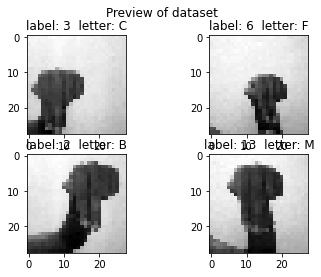

In [194]:
fig,axe=plt.subplots(2,2)
fig.suptitle('Preview of dataset')
axe[0,0].imshow(X_train[0].reshape(28,28),cmap='gray')
axe[0,0].set_title('label: 3  letter: C')
axe[0,1].imshow(X_train[1].reshape(28,28),cmap='gray')
axe[0,1].set_title('label: 6  letter: F')
axe[1,0].imshow(X_train[2].reshape(28,28),cmap='gray')
axe[1,0].set_title('label: 2  letter: B')
axe[1,1].imshow(X_train[4].reshape(28,28),cmap='gray')
axe[1,1].set_title('label: 13  letter: M')

**Frequency plot of the labels**

Text(0.5, 1.0, 'Frequency of each label')

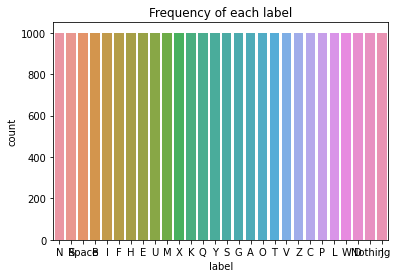

In [195]:
sns.countplot(train_label)
plt.title("Frequency of each label")

# **Building the CNN Model**

The model consist of :
1. Three convolution layer each followed bt MaxPooling for better feature capture
2. A dense layer of 512 units
3. The output layer with 24 units for 24 different classes

Sure, here's a revised description of your convolutional layers and max pooling layers:

### Convolutional Layers:

1. **Convolutional Layer 1**:
   - **Filters/Units**: 128
   - **Kernel Size**: 5x5
   - **Stride Length**: 1
   - **Activation Function**: ReLU

2. **Convolutional Layer 2**:
   - **Filters/Units**: 64
   - **Kernel Size**: 3x3
   - **Stride Length**: 1
   - **Activation Function**: ReLU

3. **Convolutional Layer 3**:
   - **Filters/Units**: 32
   - **Kernel Size**: 2x2
   - **Stride Length**: 1
   - **Activation Function**: ReLU

### Max Pooling Layers:

1. **Max Pooling Layer 1**:
   - **Pool Size (Window)**: 3x3
   - **Stride**: 2

2. **Max Pooling Layer 2**:
   - **Pool Size (Window)**: 2x2
   - **Stride**: 2

3. **Max Pooling Layer 3**:
   - **Pool Size (Window)**: 2x2
   - **Stride**: 2

### Explanation:

- **Convolutional Layers**: Each convolutional layer applies a specified number of filters (units) with a defined kernel size (filter size), stride length, and activation function (ReLU in this case).

- **Max Pooling Layers**: Each max pooling layer downsamples the feature maps generated by the convolutional layers. It uses a window (pool size) to compute the maximum value over each window and moves by the specified stride.

These layers are typically used in convolutional neural networks (CNNs) for tasks like image classification, where the convolutional layers extract features from the input images and the max pooling layers reduce spatial dimensions, helping to achieve translation invariance and reduce computational complexity. Adjust the parameters based on your specific task and dataset characteristics.

In [196]:
model=Sequential()
# model.add()
model.add(Conv2D(128,kernel_size=(5,5),
                 strides=1,padding='same',activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(3,3),strides=2,padding='same'))
model.add(Conv2D(64,kernel_size=(2,2),
                strides=1,activation='relu',padding='same'))
model.add(MaxPool2D((2,2),2,padding='same'))
model.add(Conv2D(32,kernel_size=(2,2),
                strides=1,activation='relu',padding='same'))
model.add(MaxPool2D((2,2),2,padding='same'))
          
model.add(Flatten())

**Dense and output layers**

In [197]:
model.add(Dense(units=512,activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=28,activation='softmax'))
model.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 28, 28, 128)       3328      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 14, 14, 64)        32832     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 7, 7, 32)          8224      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 512)              

In [198]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

**Training the model**

In [218]:
# model.fit(train_datagen.flow(X_train,y_train,batch_size=200),
#          epochs = 20,
#           validation_data=(X_test,y_test),
#           shuffle=1
#          )

model.fit(
    X_train,  # Training data
    y_train,  # Training labels
    batch_size=200,
    epochs=20,
    validation_data=(X_test, y_test),
    shuffle=True
)

Train on 28000 samples, validate on 112 samples
Epoch 1/20
28000/28000 [==============================] - 2s 61us/step - loss: 53.8830 - accuracy: 0.4346 - val_loss: 3.1240 - val_accuracy: 0.1696
Epoch 2/20
28000/28000 [==============================] - 2s 61us/step - loss: 1.1356 - accuracy: 0.6561 - val_loss: 3.1539 - val_accuracy: 0.1607
Epoch 3/20
28000/28000 [==============================] - 2s 60us/step - loss: 0.8385 - accuracy: 0.7335 - val_loss: 3.0840 - val_accuracy: 0.1607
Epoch 4/20
28000/28000 [==============================] - 2s 59us/step - loss: 0.6672 - accuracy: 0.7819 - val_loss: 3.1765 - val_accuracy: 0.1964
Epoch 5/20
28000/28000 [==============================] - 2s 59us/step - loss: 0.5696 - accuracy: 0.8117 - val_loss: 3.1765 - val_accuracy: 0.1429
Epoch 6/20
28000/28000 [==============================] - 2s 61us/step - loss: 0.4980 - accuracy: 0.8314 - val_loss: 3.1533 - val_accuracy: 0.1696
Epoch 7/20
28000/28000 [==============================] - 2s 61us/ste

In [220]:
import tensorflow as tf
from tensorflow.keras.models import Sequential

model.save('model.h5')

**Evaluating the model**

In [201]:
(ls,acc)=model.evaluate(x=X_test,y=y_test)

112/112 [==============================] - 0s 105us/step


In [202]:
print('MODEL ACCURACY = {}%'.format(acc*100))

MODEL ACCURACY = 100.0%


In [203]:
import cv2
import pandas as pd
import numpy as np

def image_to_csv(image_path, output_csv):
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Check if the image is loaded correctly
    if image is None:
        raise ValueError("Image not found or path is incorrect")
    # Resize the image to 28x28 pixels
    image = cv2.resize(image, (28, 28), interpolation=cv2.INTER_AREA)
    # Flatten the image to a 1D array
    pixels = image.flatten()
    
    data = {}
    for i, pixel in enumerate(pixels):
        data[f'pixel{i+1}'] = [pixel]

    # Create a DataFrame from the dictionary
    df = pd.DataFrame(data)

    # Save the DataFrame to a CSV file
    df.to_csv(output_csv, index=False)
    print(df)

    print(f"Pixel values saved to {output_csv}")

# Example usage
image_path = '/kaggle/input/american-sign-language/ASL_Dataset/Test/F/3001.jpg'  # Change this to the path of your image
output_csv = 'image_pixels.csv'        # Change this to the desired output CSV file name
image_to_csv(image_path, output_csv)


   pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0     169     169     170     169     170     169     170     170     170   

   pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0      170  ...        48        42        98       131       130       129   

   pixel781  pixel782  pixel783  pixel784  
0       128       128       128       125  

[1 rows x 784 columns]
Pixel values saved to image_pixels.csv


In [204]:
test=pd.read_csv('/kaggle/working/image_pixels.csv')

In [205]:
test=test.values.reshape(-1,28,28,1)

Text(0.5, 1.0, 'label: 13  letter: F')

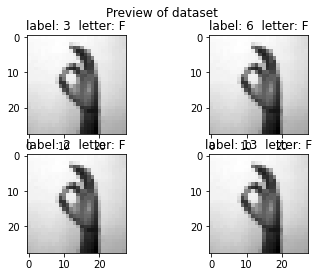

In [206]:
fig,axe=plt.subplots(2,2)
fig.suptitle('Preview of dataset')
axe[0,0].imshow(test[0].reshape(28,28),cmap='gray')
axe[0,0].set_title('label: 3  letter: F')
axe[0,1].imshow(test[0].reshape(28,28),cmap='gray')
axe[0,1].set_title('label: 6  letter: F')
axe[1,0].imshow(test[0].reshape(28,28),cmap='gray')
axe[1,0].set_title('label: 2  letter: F')
axe[1,1].imshow(test[0].reshape(28,28),cmap='gray')
axe[1,1].set_title('label: 13  letter: F')

In [207]:
response = model.predict(test)

In [208]:
response

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [209]:
og = lb.inverse_transform(response)
og

array(['F'], dtype='<U7')

In [210]:
import tensorflow as tf
from tensorflow.keras.models import Sequential

model.save('my_model.h5')

In [211]:
mdl = tf.keras.models.load_model('/kaggle/working/my_model.h5')

In [212]:
resp = mdl.predict(test)

In [213]:
resp

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [214]:
resp = model2.predict(test)
resp

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [215]:
import tensorflow as tf

# Check TensorFlow version
print("TensorFlow version:", tf.__version__)

# Check Keras version (if using TensorFlow 2.x)
print("Keras version:", tf.keras.__version__)


TensorFlow version: 2.1.0
Keras version: 2.2.4-tf


In [216]:
!pip install --upgrade tensorflow


Requirement already up-to-date: tensorflow in /opt/conda/lib/python3.6/site-packages (2.6.2)


In [217]:
# Check TensorFlow version
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.1.0
